# Milestone Project 1: Tic-Tac-Toe


### Overview - 
- 2 players should be able to play the game (both sitting at the same computer). <br>
- The board should be printed out every time a player makes a move.<br>
- You should be able to accept input of the player position and the place a symbol on the board.

### Step 1: Function that can print out a board.

We Will use the "numpad" to match numbers to the grid on a tic tac toe board:
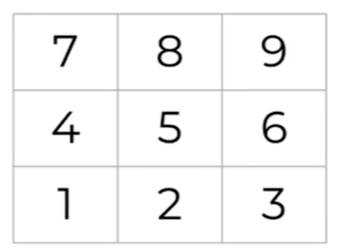

In [1]:
from IPython.display import clear_output

def display_board(board):
    clear_output() 
    
    print('   |   |')
    print(' ' + board[7] + ' | ' + board[8] + ' |  ' + board[9])
    print('   |   |')
    print('-------------')
    print('   |   |')
    print(' ' + board[4] + ' | ' + board[5] + ' |  ' + board[6])
    print('   |   |')
    print('-------------')
    print('   |   |')
    print(' ' + board[1] + ' | ' + board[2] + ' |  ' + board[3])
    print('   |   |')
    

### Test Step 1: 

In [2]:
test_board = ['#','X','O','X','O','X','O','X','O','X']
display_board(test_board)

   |   |
 X | O |  X
   |   |
-------------
   |   |
 O | X |  O
   |   |
-------------
   |   |
 X | O |  X
   |   |


### Step 2: Function that can take in a player input and assign their marker as 'X' or 'O'.

In [3]:
def player_input():
    marker = ''
    
    while not (marker == 'X' or marker == 'O'):
        marker = input('Player 1: Do you want to be X or O? ').upper()
        
    if marker == 'X':
        return ('X', 'O')
    else:
        return ('O', 'X')

### Test Step 2: 

In [4]:
player_input()

Player 1: Do you want to be X or O? x


('X', 'O')

### Step 3: Function that takes in the board list objects, a marker ('X' or 'O'), and a desired position (number 1-9) and assigns it to the board.

In [5]:
def place_marker(board,marker,position):
    board[position] = marker

### TEST Step 3:

In [6]:
place_marker(test_board,'$',8)
display_board(test_board)

   |   |
 X | $ |  X
   |   |
-------------
   |   |
 O | X |  O
   |   |
-------------
   |   |
 X | O |  X
   |   |


### Step 4: Write a function that takes in a board and checks to see if someone has won.

In [7]:
def win_check(board,mark): 
    # Returns Bool value - True or False
    return ((board[7] == mark and board[8] == mark and board[9] == mark) or # Row 1 (Across the top)
    (board[4] == mark and board[5] == mark and board[6] == mark) or # Row 2 (Across the middle)
    (board[1] == mark and board[2] == mark and board[3] == mark) or # Row 3 (Across the bottom)
    (board[7] == mark and board[4] == mark and board[1] == mark) or # Column 1 (Down the left side)
    (board[8] == mark and board[5] == mark and board[2] == mark) or # Column 2 (Down the middle)
    (board[9] == mark and board[6] == mark and board[3] == mark) or # Column 3 (Down the right side)
    (board[7] == mark and board[5] == mark and board[3] == mark) or # Diagonal
    (board[9] == mark and board[5] == mark and board[1] == mark))  # Diagonal

### TEST Step 4:

In [8]:
win_check(test_board,'X')

True

### Step 5: Function that uses the random module to randomly decide which player goes first.

In [9]:
import random 

def choose_first():
    if random.randint(0, 1) == 0:
        return 'Player 2'
    else: 
        return 'Player 1'

### Step 6: Function that returns a boolean indicating whether a space on the board is freely available.

In [10]:
def space_check(board, position):
    
    return board[position] == ' '

### Step 7: Function that checks if the board is full and returns a boolean value. True if full, False otherwise.

In [11]:
def full_board_check(board):
    for i in range(1,10):
        if space_check(board, i):
            return False
    return True

### Step 8: Function that asks for a player's next position (as a number 1-9) and then uses the function from step 6 to check if its a free position. If it is, then reutrn the position for later use. 

In [12]:
def player_choice(board):
    position = 0
    
    while position not in [1,2,3,4,5,6,7,8,9] or not space_check(board, position):
        position = int(input('Choose your next position:(1-9) '))
        
    return position

### Step 9: Function that asks the player if they want to play again and return a boolean True if they do want to play again.

In [13]:
def replay():
    
    return input('Do you want to play again? Enter Yes or No: ').lower().startswith('y')

### Step 10: Using while loops and the functions above to run the game.

In [ ]:
print('Welcome to Tic-Tac-Toe!')

while True:
    # Setting Everything up(Board, Who First, Choose Markers X,O)
    theBoard = [' ']*10
    player1_marker, player2_marker = player_input()
    turn = choose_first()
    print(turn + ' will go first.')
    
    play_game = input('Are you reaedy to play? Enter <y> for Yes or <n> for No.')
    
    if play_game.lower()[0] == 'y':
        game_on = True
    else:
        game_on = False
    # Game Play
    while game_on: # player1's turn.
        if turn == 'Player 1':
            
            display_board(theBoard)
            position = player_choice(theBoard)
            place_marker(theBoard, player1_marker, position)
            
            if win_check(theBoard, player1_marker):
                display_board(theBoard)
                print('Congratulations! You have won the game!')
                game_on = False
            else:
                if full_board_check(theBoard):
                    display_board(theBoard)
                    print('The game is a draw!')
                    break
                else:
                    turn = 'Player 2'
        
        else: # player2's turn.
            display_board(theBoard)
            position = player_choice(theBoard)
            place_marker(theBoard, player2_marker, position)
            
            if win_check(theBoard, player2_marker):
                display_board(theBoard)
                print('Player 2 has won!')
                game_on = False
            else:
                if full_board_check(theBoard):
                    display_board(theBoard)
                    print('The game is a draw!')
                    break
                else:
                    turn = 'Player 1'
            
    if not replay():
        break
    
    
    
    

Welcome to Tic-Tac-Toe!
Player 1: Do you want to be X or O? x
Player 1 will go first.
